In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('election_table.csv')

# Display the first few rows of the data to understand its structure
data.head()

,filename,partisan,level,type,candidates,choices,gamma bf,gamma mds,#1 candidate,#2 candidate,#3 candidate,#4 candidate,#5 candidate,bimodality,Ashman_D,Sarle_coefficient,Hartigan_Dip,Amplitude_Ratio,Mode_Distance
0,Maine_06122018_DemocraticPrimaryforCD2.csv,NO,FEDERAL,R,4,5,0.694512,0.676191,81.941045,79.387967,57.803647,41.832573,NaN,0.548797,5.262150,0.548797,0.999953,0.347246,0.741742
1,Maine_07142020_RepublicanCandidateforUSHouseof...,NO,FEDERAL,R,3,3,0.848794,0.848794,80.460967,70.915874,66.506950,NaN,NaN,0.468701,3.327861,0.468701,0.999969,0.584698,0.636637
2,Albany_11082022_BoardofEducation.csv,NO,LOCAL,B,5,5,0.625404,0.642626,87.805628,84.991542,79.978471,56.681532,1.968322,0.578185,1.777833,0.522028,0.999635,0.541124,0.308308
3,Minneapolis_11022021_ParkBoardAtLarge.csv,NO,LOCAL,B,7,3,0.596267,0.547818,50.342969,38.593450,35.050692,34.390193,25.049938,0.482188,2.798426,0.486148,0.999981,0.645751,0.570571
4,Minneapolis_11022021_ParkBoardDistrict2.csv,NO,LOCAL,B,3,3,0.829797,0.806626,67.439047,64.433278,62.814070,NaN,NaN,0.641805,2.773814,0.641805,0.999852,0.657586,0.328328


In [3]:
# Filter out rows without a race_id
filtered_data = data.dropna(subset=['filename'])

# Extract the locality from the filename using regular expressions
filtered_data['locality'] = filtered_data['filename'].str.extract(r'(^.*?)_\d{8}').fillna('')

# Extract the first 8 digits
filtered_data['date_str'] = filtered_data['filename'].str.extract(r'_(\d{8})')

# Convert the string to a datetime object
filtered_data['date'] = pd.to_datetime(filtered_data['date_str'], format='%m%d%Y', errors='coerce')

# Extract the year from the datetime object
filtered_data['year'] = filtered_data['date'].dt.year

# Drop the intermediate columns
filtered_data = filtered_data.drop(columns=['date_str', 'date'])

filtered_data.head()

,filename,partisan,level,type,candidates,choices,gamma bf,gamma mds,#1 candidate,#2 candidate,...,#4 candidate,#5 candidate,bimodality,Ashman_D,Sarle_coefficient,Hartigan_Dip,Amplitude_Ratio,Mode_Distance,locality,year
0,Maine_06122018_DemocraticPrimaryforCD2.csv,NO,FEDERAL,R,4,5,0.694512,0.676191,81.941045,79.387967,...,41.832573,NaN,0.548797,5.262150,0.548797,0.999953,0.347246,0.741742,Maine,2018
1,Maine_07142020_RepublicanCandidateforUSHouseof...,NO,FEDERAL,R,3,3,0.848794,0.848794,80.460967,70.915874,...,NaN,NaN,0.468701,3.327861,0.468701,0.999969,0.584698,0.636637,Maine,2020
2,Albany_11082022_BoardofEducation.csv,NO,LOCAL,B,5,5,0.625404,0.642626,87.805628,84.991542,...,56.681532,1.968322,0.578185,1.777833,0.522028,0.999635,0.541124,0.308308,Albany,2022
3,Minneapolis_11022021_ParkBoardAtLarge.csv,NO,LOCAL,B,7,3,0.596267,0.547818,50.342969,38.593450,...,34.390193,25.049938,0.482188,2.798426,0.486148,0.999981,0.645751,0.570571,Minneapolis,2021
4,Minneapolis_11022021_ParkBoardDistrict2.csv,NO,LOCAL,B,3,3,0.829797,0.806626,67.439047,64.433278,...,NaN,NaN,0.641805,2.773814,0.641805,0.999852,0.657586,0.328328,Minneapolis,2021


In [4]:
import matplotlib.pyplot as plt

def plot(choice):
    
    # Group by locality and {choice}
    grouped_data = filtered_data.groupby(['locality', f'{choice}']).size().reset_index(name='counts')

    # Get unique localities
    localities = grouped_data['locality'].unique()
    n_localities = len(localities)

    # Number of columns (you can change this as desired)
    n_cols = 4
    n_rows = n_localities // n_cols + (n_localities % n_cols > 0)

    # Plot data for each locality
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 3 * n_rows))
    axes = axes.ravel()  # Flatten axes to simplify indexing

    for i, locality in enumerate(localities):
        locality_data = grouped_data[grouped_data['locality'] == locality]
        axes[i].bar(locality_data[f'{choice}'], locality_data['counts'])
        axes[i].set_title(f"Records for {locality}")
        axes[i].set_xlabel(f"{choice.capitalize()}")
        axes[i].set_ylabel("Number of Records")
        axes[i].set_xticks(locality_data[f'{choice}'])
        axes[i].set_xticklabels(locality_data[f'{choice}'], rotation=45)

    # Remove any unused subplots
    if n_localities % n_cols != 0:
        for j in range(n_localities, n_cols * n_rows):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

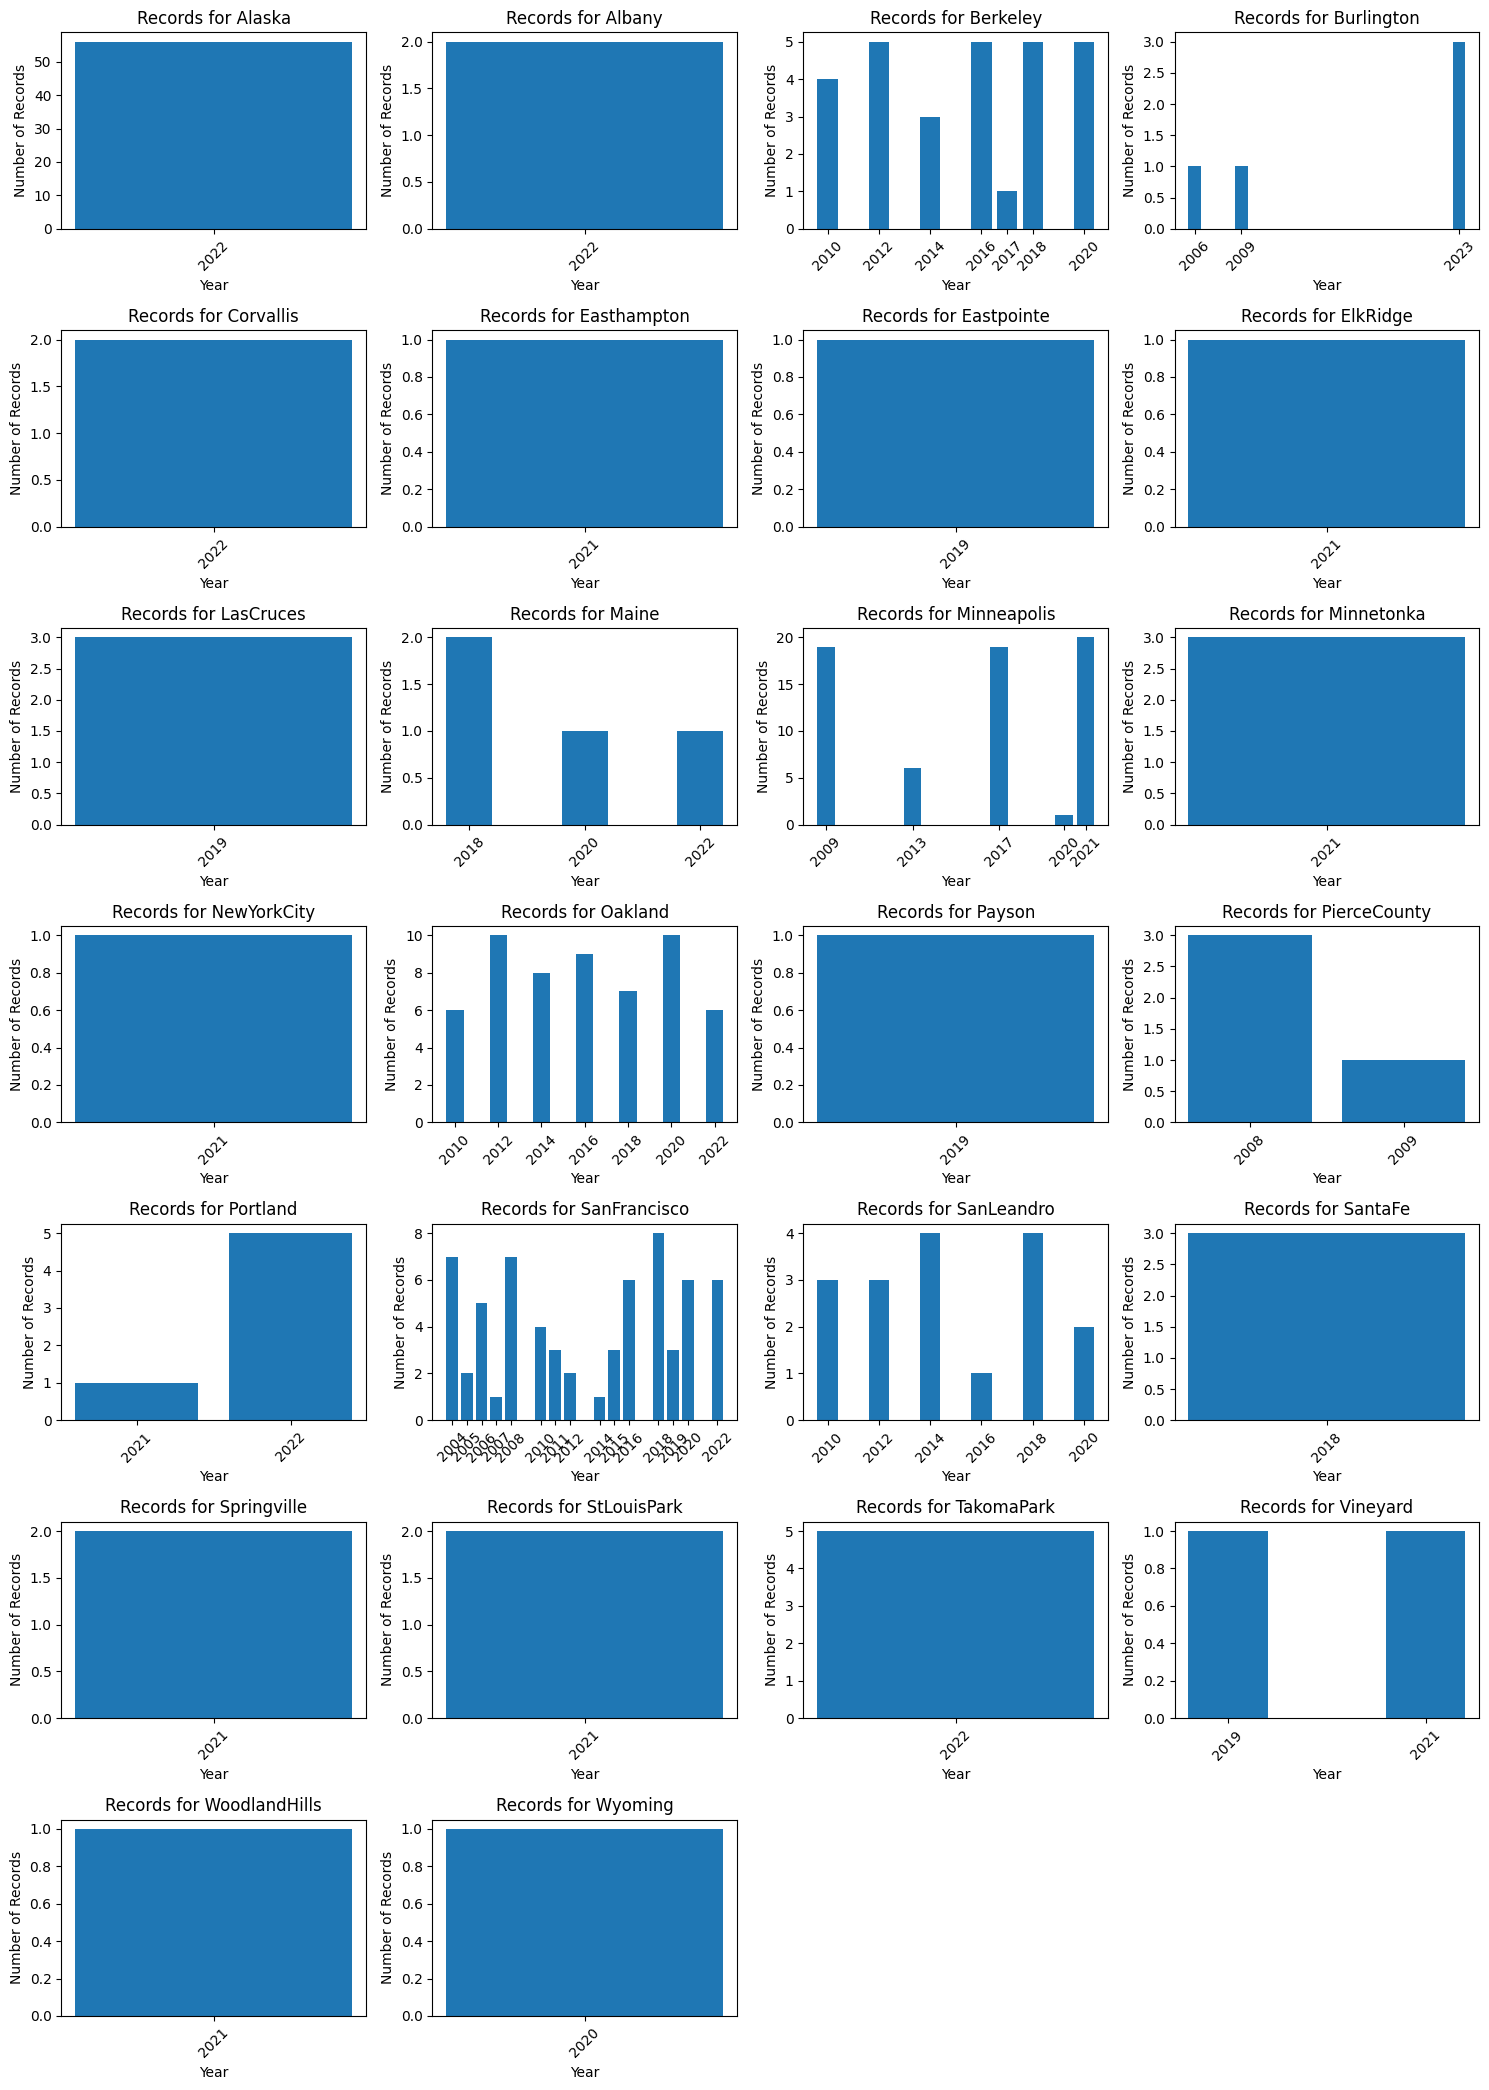

In [5]:
plot('year')

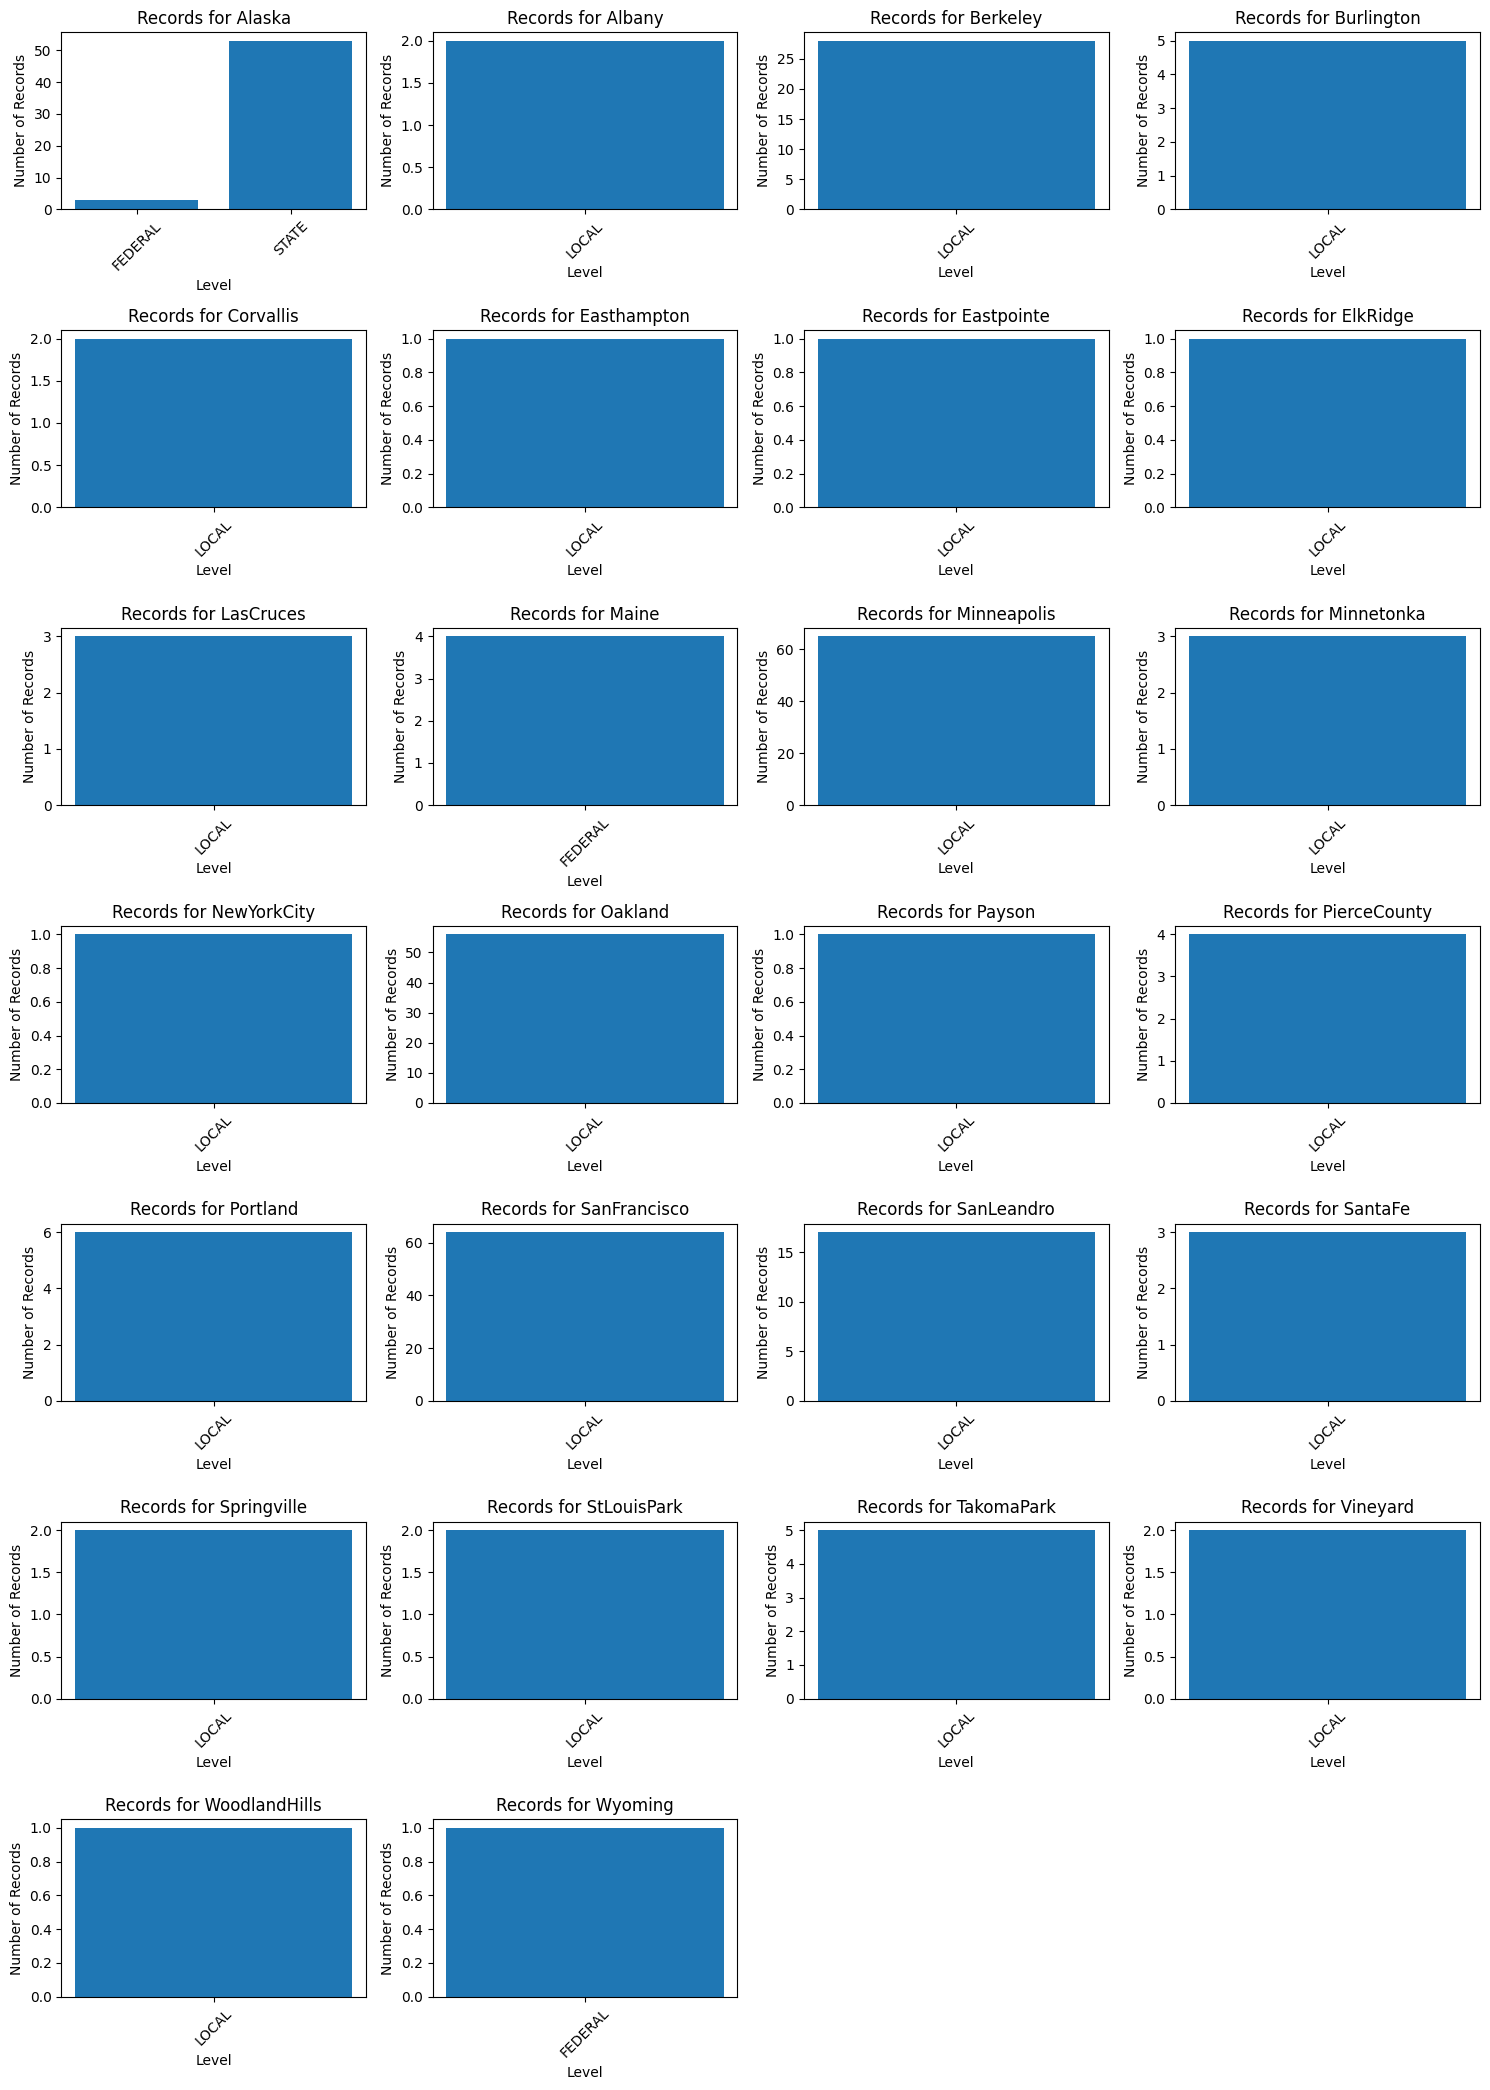

In [6]:
plot('level')

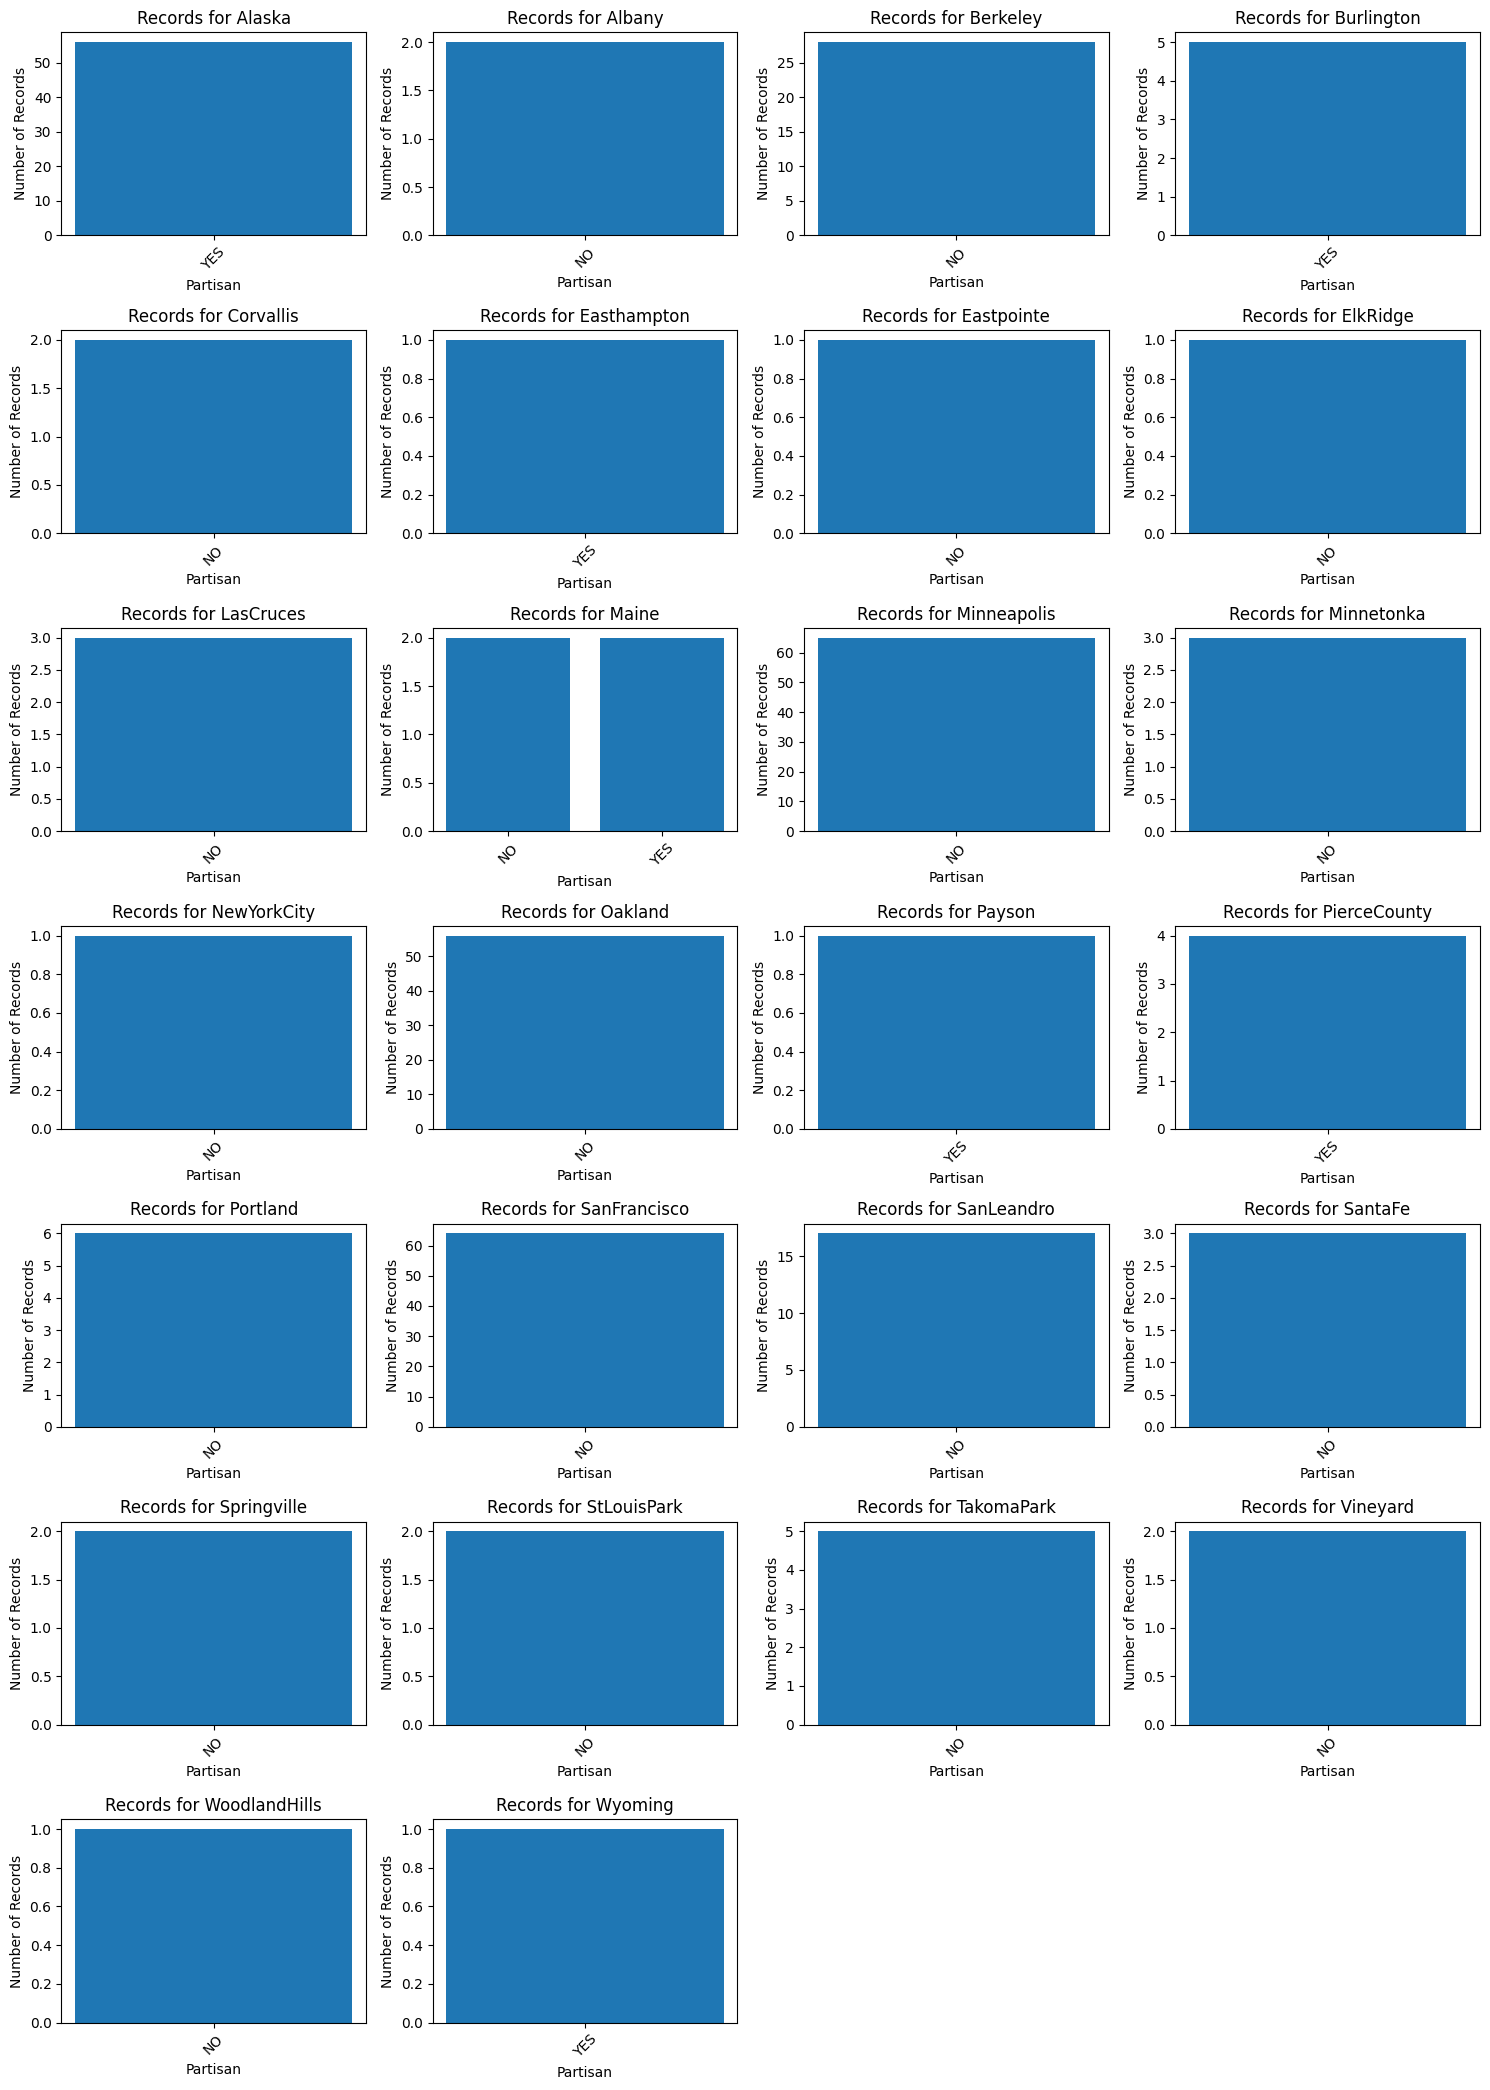

In [7]:
plot('partisan')

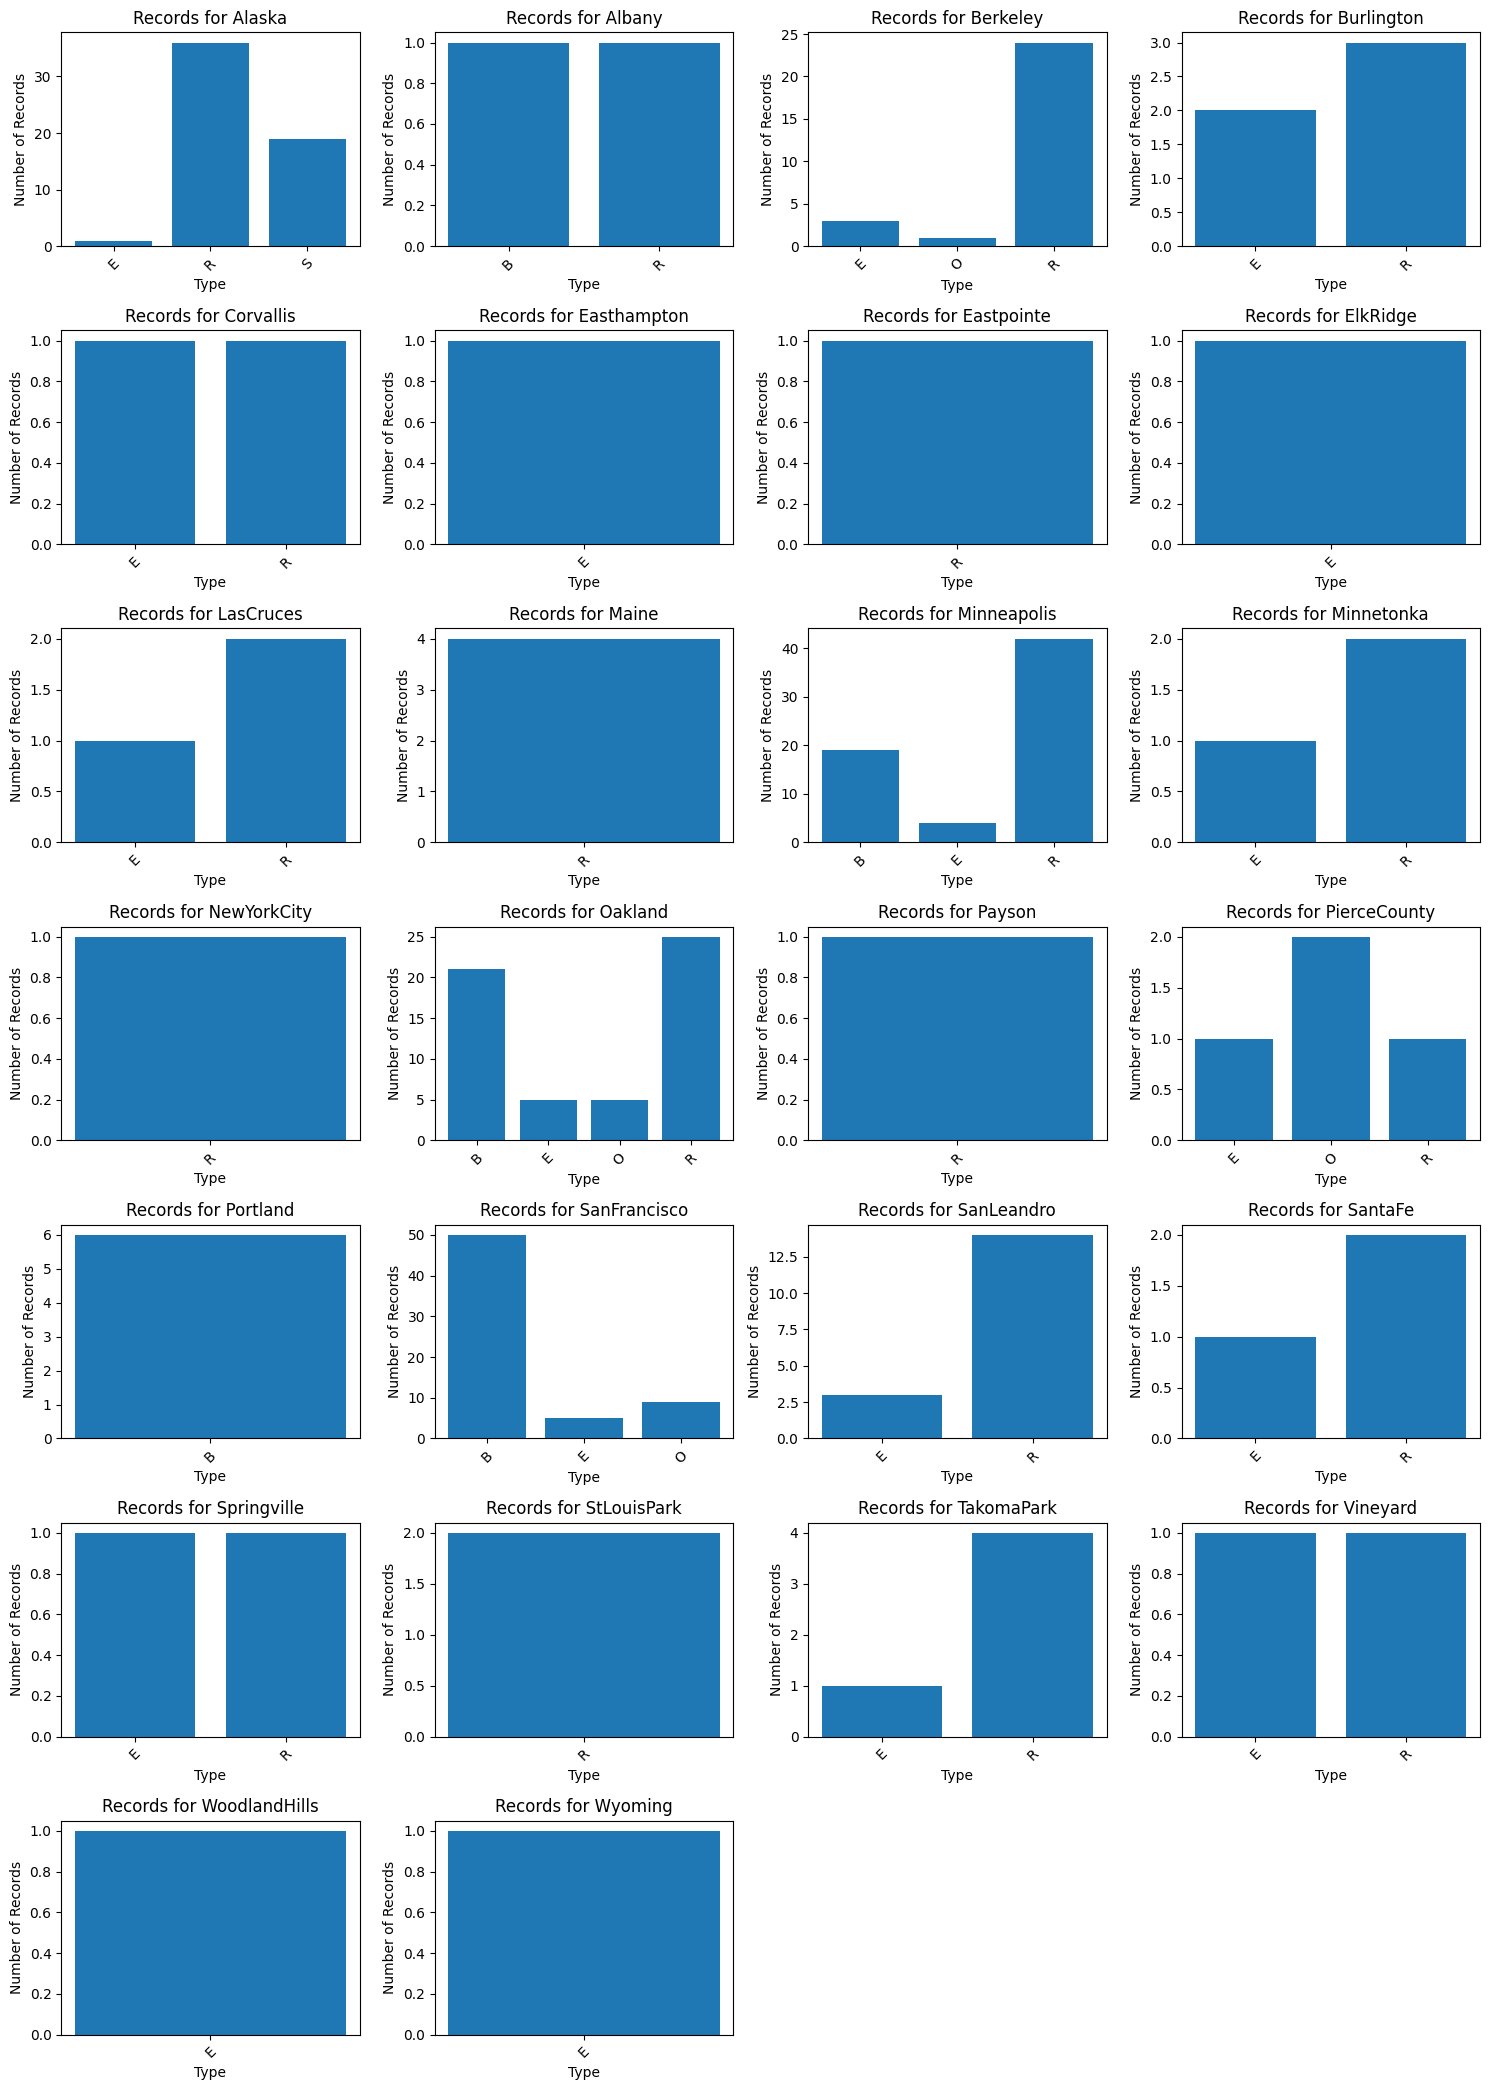

In [8]:
plot('type')

In [13]:
# Parameters
csv_path = "election_peak.csv"
output_html_path = "election_peak.html"
plots_folder_path = "plots"

# Load and filter the CSV data
election_data = pd.read_csv(csv_path)
filtered_data = election_data[
    (election_data['level'].isin(['STATE', 'FEDERAL'])) &
    (election_data['partisan'] == 'YES')
]

# Define the plot types
plot_types = ["_freq", "_hist", "_mds", "_kde"]

# Create the HTML table with embedded images
html_parts = []

# HTML Header with additional DataTables Button extension
html_parts.append("""
<html>
<head>
    <link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.10.21/css/jquery.dataTables.css">
    <link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/buttons/1.6.2/css/buttons.dataTables.min.css">
    <script type="text/javascript" charset="utf8" src="https://code.jquery.com/jquery-3.5.1.min.js"></script>
    <script type="text/javascript" charset="utf8" src="https://cdn.datatables.net/1.10.21/js/jquery.dataTables.js"></script>
    <script type="text/javascript" charset="utf8" src="https://cdn.datatables.net/buttons/1.6.2/js/dataTables.buttons.min.js"></script>
    <script type="text/javascript" charset="utf8" src="https://cdn.datatables.net/buttons/1.6.2/js/buttons.colVis.min.js"></script>
</head>
<body>
<table id="data_table" class="display">
    <thead>
        <tr>
""")

# Table columns
for col in filtered_data.columns:
    html_parts.append(f"<th>{col}</th>")
for plot_type in plot_types:
    html_parts.append(f"<th>Plot {plot_type}</th>")
html_parts.append("</tr></thead><tbody>")

# Rows with data and larger image paths
for _, row in filtered_data.iterrows():
    html_parts.append("<tr>")
    for value in row:
        html_parts.append(f"<td>{value}</td>")
    for plot_type in plot_types:
        plot_path = f"{plots_folder_path}/{row['filename']}{plot_type}.png"
        html_parts.append(f'<td><img src="{plot_path}" alt="Image for {row["filename"]}{plot_type}" width="900"></td>')
    html_parts.append("</tr>")

# HTML Footer with DataTables initialization including the Buttons extension for column visibility
html_parts.append("""
    </tbody>
</table>
<script>
    $(document).ready( function () {
        $('#data_table').DataTable({
            dom: 'Bfrtip',
            buttons: [
                'colvis'
            ],
            pageLength: 10000
        });
    } );
</script>
</body>
</html>
""")

# Save the HTML content to the specified path
with open(output_html_path, 'w') as f:
    f.write("\n".join(html_parts))